In [1]:
import sys
sys.path.insert(0, '..')
#for local import of parent dict

## Import the usual libraries
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms

from ggml import ggml
import scipy

import os
import numpy as np

#synth Data
from ggml.data import SyntheticDataset
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

#Optimal Transport
import ot

#Plotting
from ggml.plot import plot_distribution, plot_emb, hier_clustering, plot_ellipses
import matplotlib.pyplot as plt
import seaborn as sns


3.801305217096917e-15


/home/kuehn/anaconda3/envs/ggml/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Parameter for GGML
#Can be tuned with provided hyperparameter tuning script
alpha = 10 
lambda_ = 0.1

neighbor_t = 3 
rank_k = 5 

lr = 0.02 
norm = 1

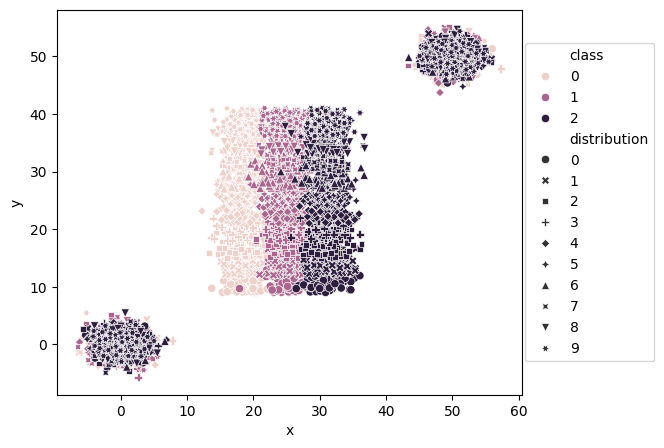

passed neighs: 3


In [3]:
#Number of element sampled 
n = 100

#Length of list defines number of classes
means = [5,10,15]
label =[0,1,2]

#Length of list defines number of distributions in each class
offsets = np.arange(0,30,3)+1.5

#Lnegth of list defines number of modes that can not be differentiated between classes
shared_means_x = [0, 40]
shared_means_y = [0, 50]

noise_scale = 1
noise_dims = 199

training_data = SyntheticDataset(distribution_size=n, class_means = means, offsets = offsets, shared_means_x=shared_means_x, shared_means_y=shared_means_y, plot=True, varying_size=False,t=neighbor_t,noise_scale=noise_scale,noise_dims=noise_dims)#noise_scale=1,noise_dims=199)

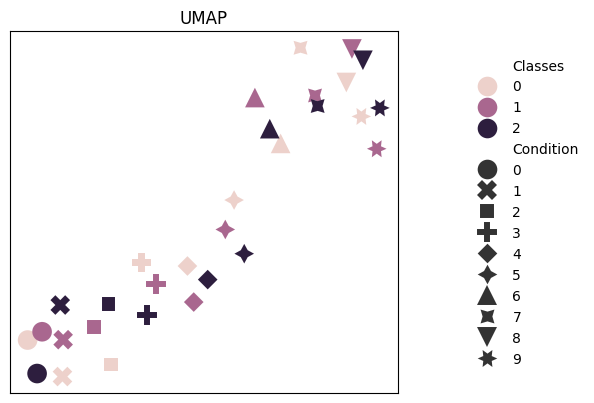

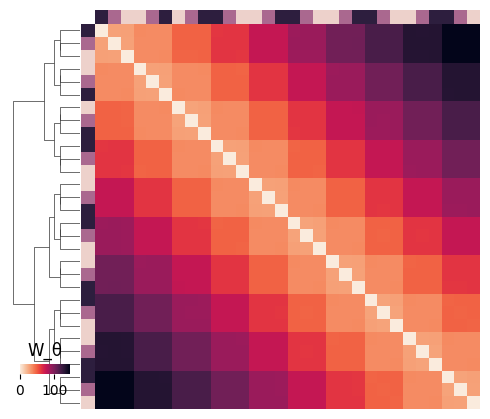

In [4]:
mahalanobis_matrix_euclidean = np.identity(noise_dims+1)
D_eucl = training_data.compute_OT_on_dists(w = mahalanobis_matrix_euclidean)

Feature batch shape: torch.Size([128, 3, 300, 200])
Labels batch shape: torch.Size([128, 3])


/home/kuehn/ot_metric_learning/GlobalGround-MetricLearning/code/ggml/plot/plotting.py:45: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.scatterplot(df_projected,x='x',y='y',hue="class",style='dist',alpha=0.5)


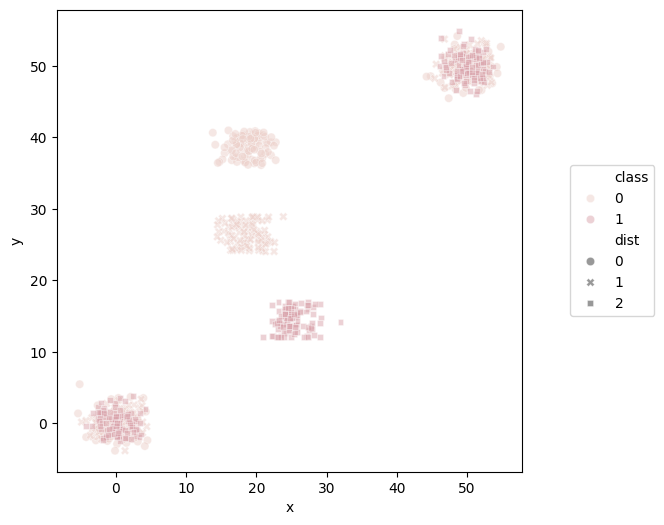

Example Triplet with Labels: [0.0, 0.0, 1.0]


In [ ]:
training_dataset = DataLoader(training_data , batch_size=128, shuffle=True) 

train_features, train_labels = next(iter(training_dataset))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")


trpl_distributions = train_features[0]
trpl_label = train_labels[0]


plot_distribution(trpl_distributions[:,:,:2],np.asarray(trpl_label,dtype=int))

plt.show()
print(f"Example Triplet with Labels: {[l.item() for l in trpl_label]}")


Running GGML with alpha: 10, lambda: 0.1, rank: 5


100%|██████████| 5/5 [02:15<00:00, 27.06s/it]


Iteration 1 with Loss  55.25176239013672


100%|██████████| 5/5 [02:14<00:00, 26.90s/it]


Iteration 2 with Loss  49.60199737548828


100%|██████████| 5/5 [02:06<00:00, 25.26s/it]


Iteration 3 with Loss  48.88840103149414


100%|██████████| 5/5 [02:08<00:00, 25.69s/it]


Iteration 4 with Loss  58.54812240600586


100%|██████████| 5/5 [02:06<00:00, 25.22s/it]


Iteration 5 with Loss  51.4244384765625
Compute all OT distances after 5 iterations


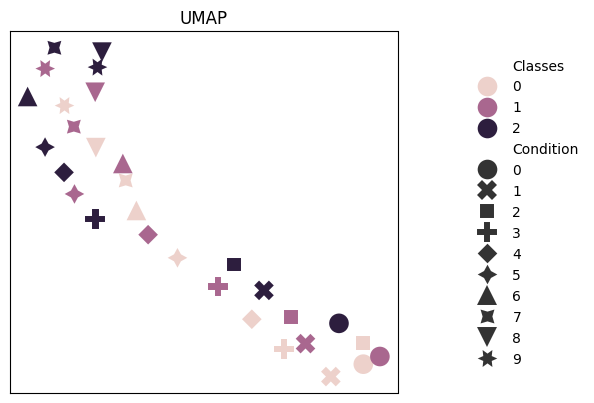

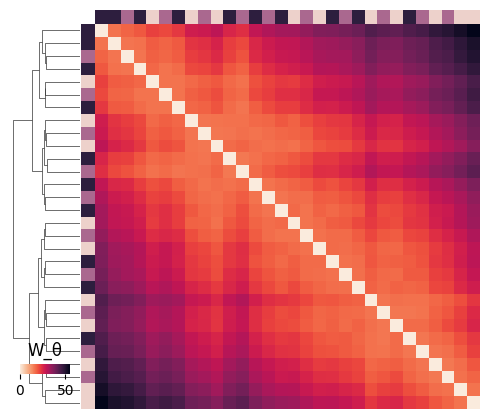

100%|██████████| 5/5 [02:19<00:00, 27.96s/it]


Iteration 6 with Loss  47.55028533935547


100%|██████████| 5/5 [02:17<00:00, 27.47s/it]


Iteration 7 with Loss  49.20589828491211


100%|██████████| 5/5 [02:16<00:00, 27.38s/it]


Iteration 8 with Loss  47.882225036621094


100%|██████████| 5/5 [02:14<00:00, 26.85s/it]


Iteration 9 with Loss  41.81159973144531


100%|██████████| 5/5 [02:13<00:00, 26.76s/it]


Iteration 10 with Loss  46.46118927001953
Compute all OT distances after 10 iterations


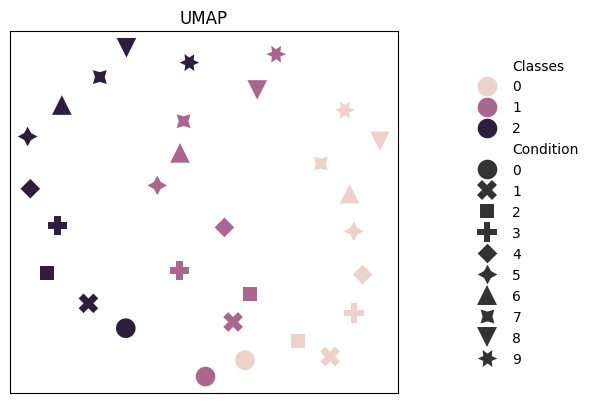

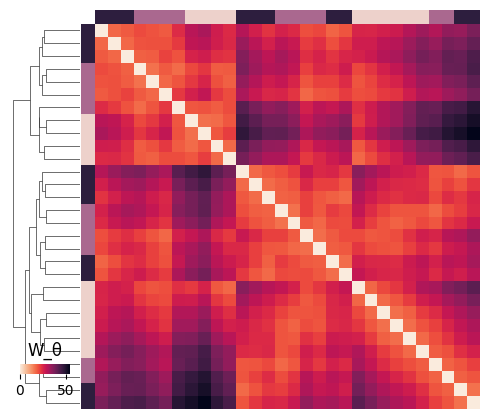

100%|██████████| 5/5 [02:09<00:00, 25.89s/it]


Iteration 11 with Loss  41.24588394165039


100%|██████████| 5/5 [02:17<00:00, 27.58s/it]


Iteration 12 with Loss  48.779659271240234


100%|██████████| 5/5 [02:23<00:00, 28.65s/it]


Iteration 13 with Loss  46.91982650756836


100%|██████████| 5/5 [02:25<00:00, 29.17s/it]


Iteration 14 with Loss  48.16056823730469


100%|██████████| 5/5 [02:51<00:00, 34.31s/it]


Iteration 15 with Loss  47.38833236694336
Compute all OT distances after 15 iterations


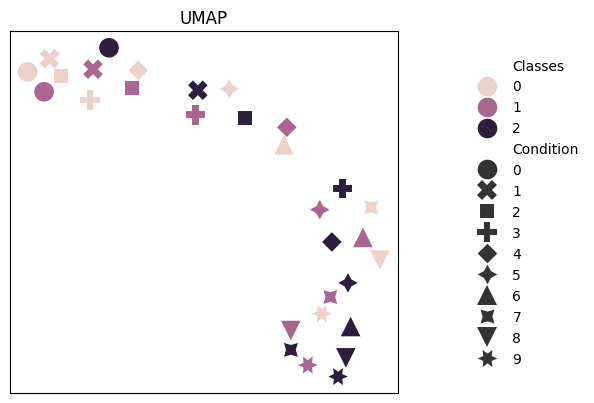

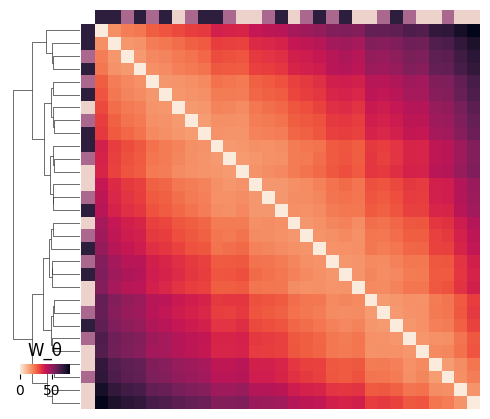

100%|██████████| 5/5 [02:05<00:00, 25.14s/it]


Iteration 16 with Loss  45.449710845947266


100%|██████████| 5/5 [02:16<00:00, 27.21s/it]


Iteration 17 with Loss  43.33898162841797


100%|██████████| 5/5 [02:05<00:00, 25.01s/it]


Iteration 18 with Loss  38.860897064208984


100%|██████████| 5/5 [02:15<00:00, 27.08s/it]


Iteration 19 with Loss  49.45368194580078


 40%|████      | 2/5 [01:01<01:33, 31.11s/it]

In [ ]:
w_theta = ggml(training_dataset,a=alpha,l=lambda_,k=rank_k,lr=lr,norm=norm,max_iterations=30,plot_i_iterations=10,dataset=training_data,n_threads=64)

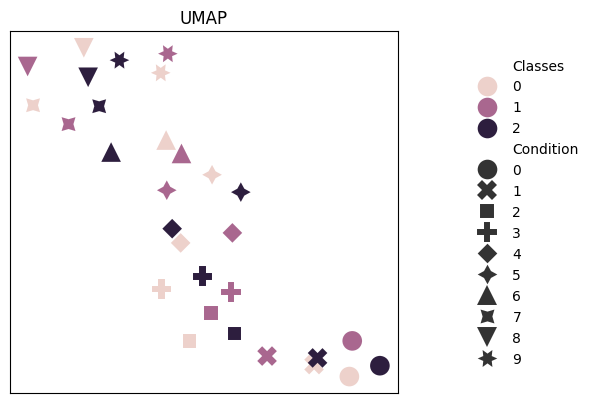

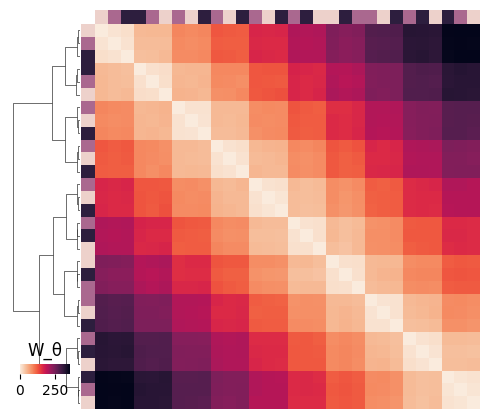

In [ ]:
D_ggml = training_data.compute_OT_on_dists(w = w_theta)

In [ ]:
from ggml.plot import plot_w_theta
np.set_printoptions(suppress=True,precision=16)

print(w_theta.clone().detach().numpy())
fig, axs = plt.subplots(ncols=2, figsize=(3,6))


#fig, ax = plt.subplots(figsize=(3,3))
ax = plot_w_theta(np.identity(2), ax=axs[0,0])
print(ax)
ax.set_title(r'Euclidean $d_2$ (Baseline)')
ax.get_figure().set_size_inches(4.8,5)

ax = plot_w_theta(w_theta.clone().detach().numpy(), ax=axs[1,1])
print(ax)
ax.set_title(r'Mahalanobis $d_\theta$ (GGML)')
#ax.get_figure().set_size_inches(2.4,5)


plt.tight_layout()
plt.show()





ImportError: cannot import name 'plot_w_theta' from 'ggml.plot' (/home/kuehn/ot_metric_learning/GlobalGround-MetricLearning/code/ggml/plot/__init__.py)